<h2>Task 1 - Preprocessing, signal manipulation (20 pts)</h2><p>In order to
use the given video files for calculation and analysis of the audio track, the
files have to be preprocessed for efficiency, performance, and system resource
reasons. The following transformation steps have to be performed. The given
figure illustrates how to work them off.</p>

<ul>
 <li>Extraction and Decoding of the
     AAC-encoded audio track out of the MPEG-4 video files</li>
 <ul>
  <li>You can easily achieve this
      using FFMPEG and the following command:&nbsp;</li>
  <li>ffmpeg
      -i &lt;input_file.mp4&gt; -acodec pcm_s16le -y &lt;output_file.wav&gt;</li>
   <li>Use Python subprocesses to make such an FFMPEG call.</li>
 </ul>
 <li>Resampling (reduction of sampling
     frequency down to 22050/11025/8000 Hz).</li>
 <li>Normalization of the audio
     files</li>
 <li>Downmix all included channels
     down to one (--&gt; mono signal)</li>
</ul>

<p>Using scipy
or LibROSA &nbsp;in <b>Python</b>, you can
easily read PCM-encoded WAV-files. Check,</p>

<p><span lang="EN-GB"><a href="https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.io.wavfile.read.html"><span lang="EN-US">https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.io.wavfile.read.html</span></a></span></p>

<p><span lang="EN-GB"><a href="https://librosa.github.io/librosa/tutorial.html"><span lang="EN-US">https://librosa.github.io/librosa/tutorial.html</span></a></span></p>

<p>Your samples
can then be further processed as they are stored in a numpy array.</p><br><p><img src="imgs/preprocess.png" alt="Preprocessing Steps" width="200" height="270"></p><p>For these
transformation steps (<b>except</b> audio track extraction and decoding),
provide a <b>Jupyter Notebook</b> that combines all the necessary steps. Prepare a plot to be shown in the below call, using <b>matplotlib</b>.


In [ ]:
#import your solution here
%run Implementation.ipynb

target_sr = 22050
y = preprocess(input_file = "../videos/DevSet/01_DevilsAdvocate_02.mp4", output_file = "../testfile_processed.wav", target_sr = 22050)
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=target_sr)
plt.title('Processed Audiofile')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

Do also consider a function to preprocess all audio files within a directory, so that you can conveniently sample all provided video files at once:

In [ ]:
%run Implementation.ipynb

preprocessDirectory(input_directory = "../videos/DevSet", output_directory = "../processed_files", target_sr = 22050)

### Further Questions
Critically think about the following questions and answer them below</p>


 #### 1. What is the objective of each step and why are they necessary or needless?
   - Extracting Audio from Video
      - We have to do this to be able to process the audio, as it is embedded in the MPEG-4 file
   - Decoding from AAC to WAV
      - We cant work with AAC, as it is a complex encoded Format
      - WAV is relatively simple, containing the PCM Signal and it's properties
      - it can be treated like a vector
   - Resampling
      - It is not a mandatory step, but if we resample the audio to a lower sample-rate, there is less data to work with
      - It helps gaining performance
   - Amplitude Normalization
      - This is also not mandatory, but this is the best way to bring the audio signal to the highest level without losing information
      - Making it more comparable to other audio files
   - Downmix to Mono
      - This is somewhat mandatory, as we want to have just one signal to work with
      - We don't need the stereo information for our needs
       

 #### 2. What is the impact of the chosen sampling frequency with regard to further processing steps?
   - Once resampled to a lower sampling frequency, one isn't able to bring the lost information back
   - Recovering the lost information isn't possible anymore
   - Important information (in high frequencies) might got lost

 #### 3. Think about feasible strategies, alternative procedures, and their consequences. What could be common pitfalls?
 ...

 #### 4. What are the consequences for the resulting audio files with respect to the extractable information before and after the processes?
 *Provide two figures (for one exemplary file only) which demonstrates the effects on the signal before and after the transformation. Choose proper axis ranges in order to make the changes clearly apparent.*
 
 ...

In [ ]:
%run Implementation.ipynb
input = "../videos/DevSet/01_PulpFiction_02.mp4"
output = "test.wav"
subprocess.run(['ffmpeg', '-i', input, '-acodec' ,'pcm_s16le', '-y', output])

y_original, orig_sr = librosa.load("test.wav", sr=None, mono=False)

target_sr
y_preprocessed = preprocess(input_file = input, output_file = "test_processed.wav", target_sr = target_sr)

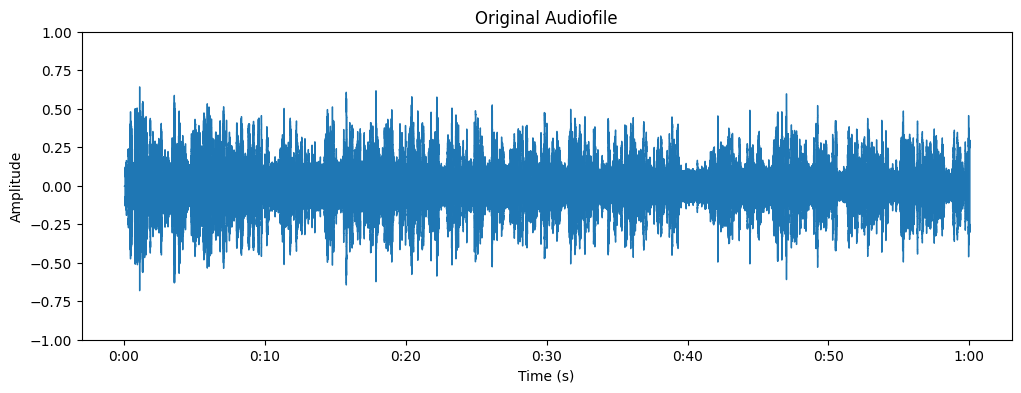

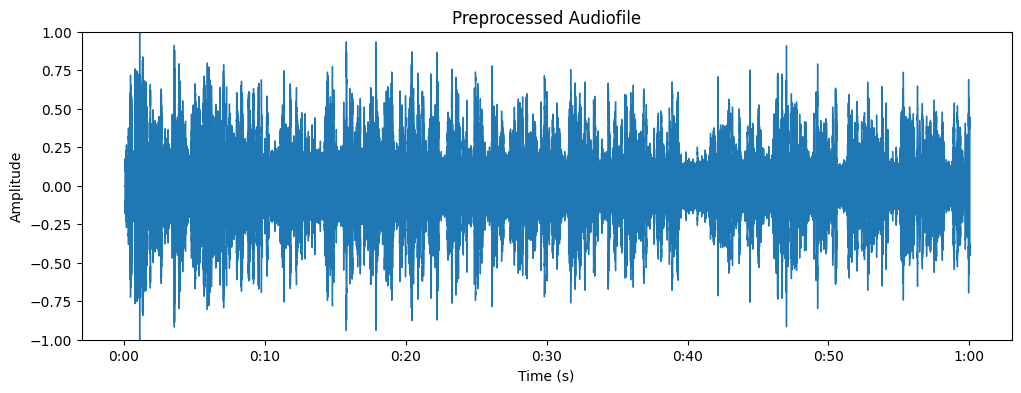

In [22]:
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y_original, sr=orig_sr)
plt.title('Original Audiofile')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.ylim([-1, 1]) 
plt.show()

plt.figure(figsize=(12, 4))
librosa.display.waveshow(y_preprocessed, sr=target_sr)
plt.title('Preprocessed Audiofile')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.ylim([-1, 1]) 
plt.show()

### You should turn in: ### 
* Answers to the given questions
* 2 figures
* jupyter notebook (Implementation) that performs the preprocessing steps